<a href="https://colab.research.google.com/github/TheRyidGilani/DS8015/blob/main/DS8015_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

**Q1.1: Load the data from the csv file and clean it if necessary**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Read the CSV file into a DataFrame
mall_customers = pd.read_csv('/content/Mall_Customers.csv')
# Display the first 5 rows
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check for missing values
missing_values = mall_customers.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Since there are no Missing values, therefore we can proceed to the next step.

**Q1.2: Display the data as a graph of your choice where it will be possible to visually see if there is any
clusters of age vs income groups**


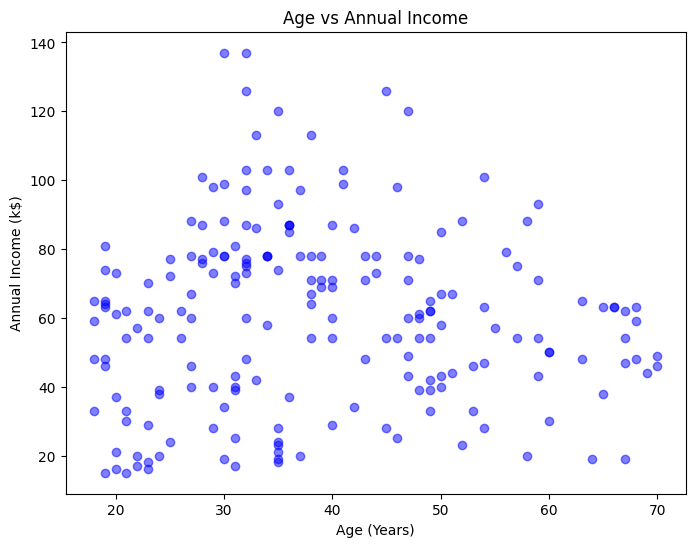

In [ ]:
# Create a scatter plot of age vs income
plt.figure(figsize=(8, 6))
plt.scatter(mall_customers['Age'], mall_customers['Annual Income (k$)'], color='blue', alpha=0.5)
plt.title('Age vs Annual Income')
plt.xlabel('Age (Years)')
plt.ylabel('Annual Income (k$)')
plt.show()

Upon visual inspection, it is denoted that there are no clearly separated clusters in the Annual Income vs Age chart shown above.

Therefore it will be arbitrarily seperated into 2 clusters for now.

**Q1.3: Run a clustering algorithm of your choice with the number of cluster you can visually decide**

In [ ]:
# Select features (age and annual income) for clustering
X = mall_customers[['Age', 'Annual Income (k$)']]

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
mall_customers['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


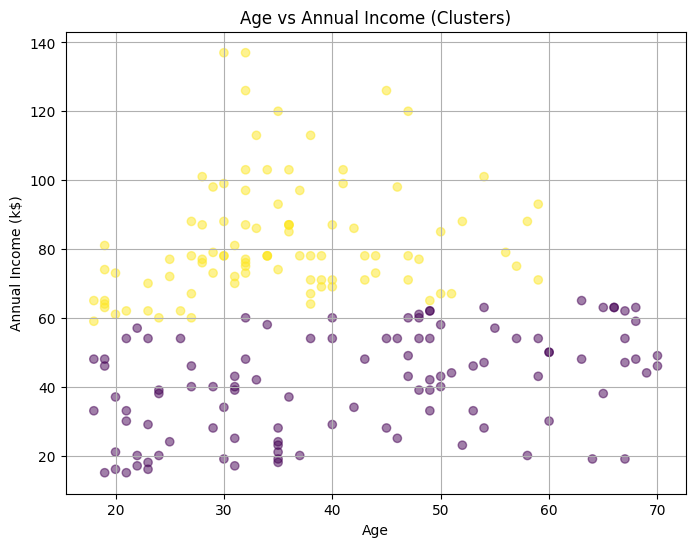

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Age'], X['Annual Income (k$)'], c=mall_customers['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Age vs Annual Income (Clusters)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True)

**Q1.4: Select one (or more) of the method of choice given in the question to select the optimum
number of clusters. Store the cluster number in the dataframe (because we will use it in Q2)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

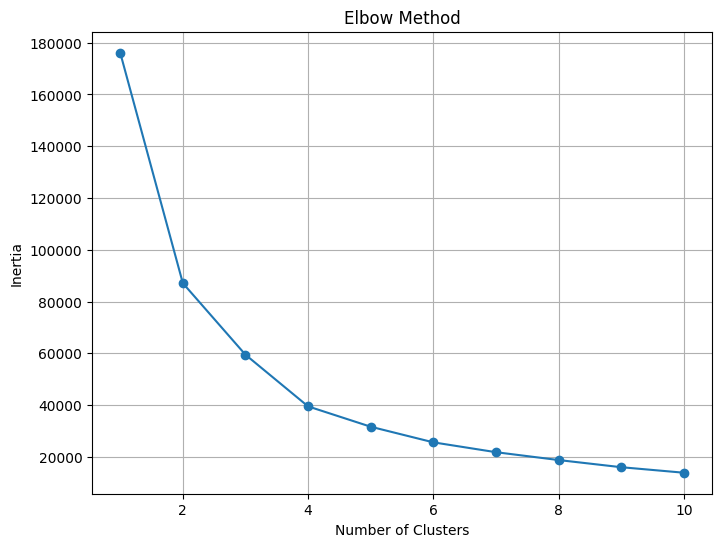

In [ ]:
# Try different number of clusters and calculate the inertia
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Based on the Elbow Method, I selected 4 clusters as the optimum number of segments. The Elbow Method helps identify the point where the inertia (sum of squared distances to the nearest centroid) begins to decrease at a slower rate, indicating diminishing returns in terms of explaining the variance in the data. In this case, the plot showed an "elbow" at 4 clusters, suggesting that adding more clusters beyond this point may not significantly reduce the inertia. Therefore, I chose 4 clusters as the optimum number for segmenting the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-f0cbdedadc8e>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], label=f'Cluster {cluster_label}', cmap='viridis', alpha=0.5)


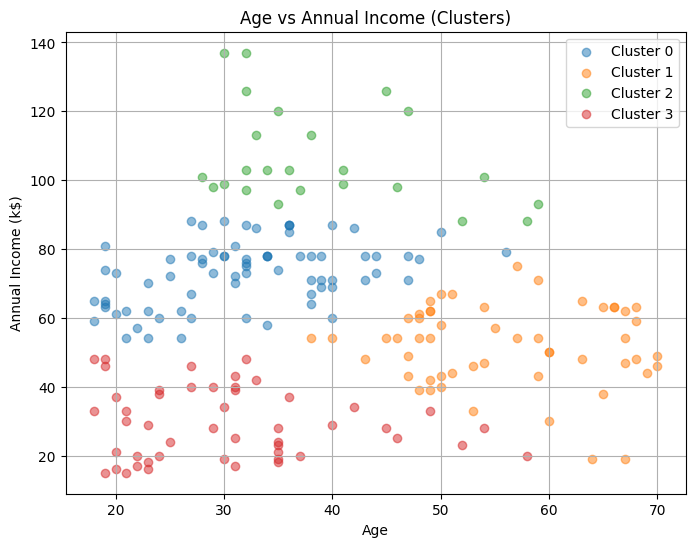

In [ ]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Iterate over unique cluster labels
for cluster_label in np.unique(cluster_labels):
    # Extract data points for the current cluster
    cluster_data = X[cluster_labels == cluster_label]

    # Scatter plot for the current cluster
    plt.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], label=f'Cluster {cluster_label}', cmap='viridis', alpha=0.5)

plt.title('Age vs Annual Income (Clusters)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True)
plt.legend()
plt.show()

# Add cluster labels to the DataFrame
mall_customers['Cluster'] = cluster_labels

**Q1.5: Decide about a name of the cluster based on the selected age and income category. Add a feature to the dataframe containing the name of the cluster assigned by your clustering algorithm.**

In [ ]:
# Define cluster names based on cluster labels
cluster_names = {
    0: 'Young Aged and Average Income',
    1: 'Old Aged and Average Income',
    2: 'Middle Aged and High Income',
    3: 'Young Aged and Low Income'
}

# Map cluster labels to cluster names
mall_customers['Cluster Name'] = mall_customers['Cluster'].map(cluster_names)

# Display the DataFrame with cluster names
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster Name
0,1,Male,19,15,39,3,Young Aged and Low Income
1,2,Male,21,15,81,3,Young Aged and Low Income
2,3,Female,20,16,6,3,Young Aged and Low Income
3,4,Female,23,16,77,3,Young Aged and Low Income
4,5,Female,31,17,40,3,Young Aged and Low Income


**Q1.6: Draw a histogram to show the clusters you found in this question vs number of people member
of these clusters.**

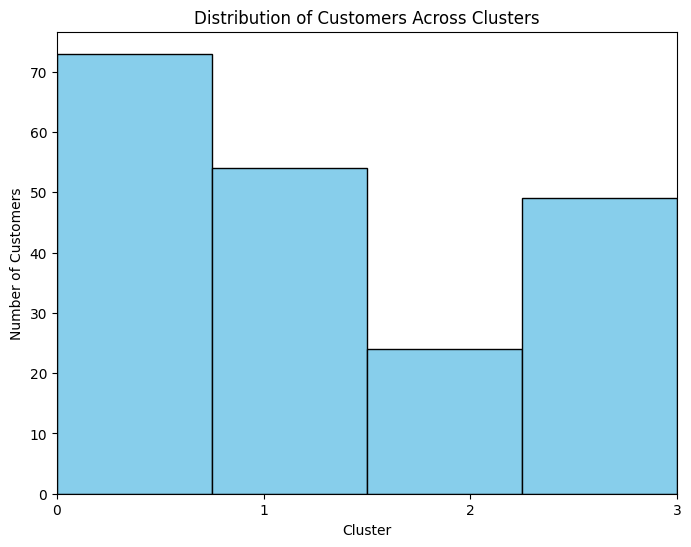

In [ ]:
# Count the number of customers in each cluster
cluster_counts = mall_customers['Cluster'].value_counts()

# Plot the histogram (bar plot)
plt.figure(figsize=(8, 6))
plt.hist(cluster_counts.index, bins=len(cluster_counts), weights=cluster_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(cluster_counts.index)

# Set the x-axis limits to zoom in on a specific range of clusters
plt.xlim(0, len(cluster_counts) - 1)

plt.show()

## **References for Question 1**

https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

https://www.youtube.com/watch?v=iNlZ3IU5Ffw

# **Question 2**

###**Getting the Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Step 1: Getting the Data
data = pd.read_csv("/content/Airbnb_Data.csv")

In [ ]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,NaN,20009,0.0,1.0


###**Preprocessing**

In [ ]:
data.shape

(74111, 29)

It looks like there are 74,111 rows and 29 columns. Quite a large dataset, it must have some missing values.

In [ ]:
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

There are lots of missing values, this could be an issue.

I am going to delete the rows that have missing values.

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [ ]:
data.shape

(38502, 29)

After deleting all the rows with missing values, it looks like we are left with 38,502 rows and 29 columns. It is still a big dataset.

###**Exploratory Data Analysis (EDA)**

In [ ]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,3.850200e+04,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000
mean,1.123236e+07,4.745546,3.233754,1.215197,38.759075,-90.895232,32.975014,94.332217,1.252402,1.759259
std,6.084071e+06,0.658015,2.137687,0.551349,3.007696,21.446666,45.420254,6.876715,0.836481,1.287905
min,9.410000e+02,0.000000,1.000000,0.000000,33.705835,-122.511500,1.000000,20.000000,0.000000,0.000000
25%,6.233497e+06,4.304065,2.000000,1.000000,34.185077,-118.326008,5.000000,92.000000,1.000000,1.000000
50%,1.218796e+07,4.700480,2.000000,1.000000,40.682550,-74.001777,16.000000,96.000000,1.000000,1.000000
75%,1.638125e+07,5.164786,4.000000,1.000000,40.760402,-73.949291,42.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-71.000462,542.000000,100.000000,10.000000,18.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 1 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38502 non-null  int64  
 1   log_price               38502 non-null  float64
 2   property_type           38502 non-null  object 
 3   room_type               38502 non-null  object 
 4   amenities               38502 non-null  object 
 5   accommodates            38502 non-null  int64  
 6   bathrooms               38502 non-null  float64
 7   bed_type                38502 non-null  object 
 8   cancellation_policy     38502 non-null  object 
 9   cleaning_fee            38502 non-null  bool   
 10  city                    38502 non-null  object 
 11  description             38502 non-null  object 
 12  first_review            38502 non-null  object 
 13  host_has_profile_pic    38502 non-null  object 
 14  host_identity_verified  38502 non-null

Looks like there are quite a few categorical features.

To simplify the process, the features below are randomly chosen as the only categorical features.

The remaining categorical features will be deleted.

In [ ]:
# Define the list of columns to keep
categorical_columns_to_keep = ['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

# Filter out categorical columns to drop based on columns to keep
categorical_columns_to_drop = [col for col in data.select_dtypes(include=['object']).columns if col not in categorical_columns_to_keep]

# Drop the categorical columns that are not in the list of columns to keep
data.drop(columns=categorical_columns_to_drop, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 1 to 74110
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38502 non-null  int64  
 1   log_price             38502 non-null  float64
 2   room_type             38502 non-null  object 
 3   accommodates          38502 non-null  int64  
 4   bathrooms             38502 non-null  float64
 5   cancellation_policy   38502 non-null  object 
 6   cleaning_fee          38502 non-null  bool   
 7   instant_bookable      38502 non-null  object 
 8   latitude              38502 non-null  float64
 9   longitude             38502 non-null  float64
 10  number_of_reviews     38502 non-null  int64  
 11  review_scores_rating  38502 non-null  float64
 12  bedrooms              38502 non-null  float64
 13  beds                  38502 non-null  float64
dtypes: bool(1), float64(7), int64(3), object(3)
memory usage: 4.1+ MB


Much better, only 13 columns now.

Next, we will visually compare the numerical features to the Target feature.

**Numerical Values**

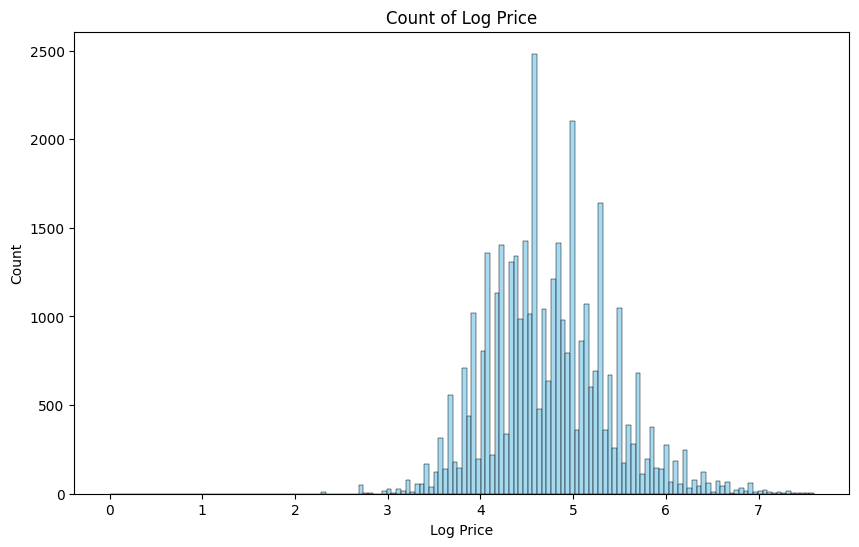

In [ ]:
# Plot count of log price
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], kde=False, color='skyblue')
plt.title('Count of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.show()

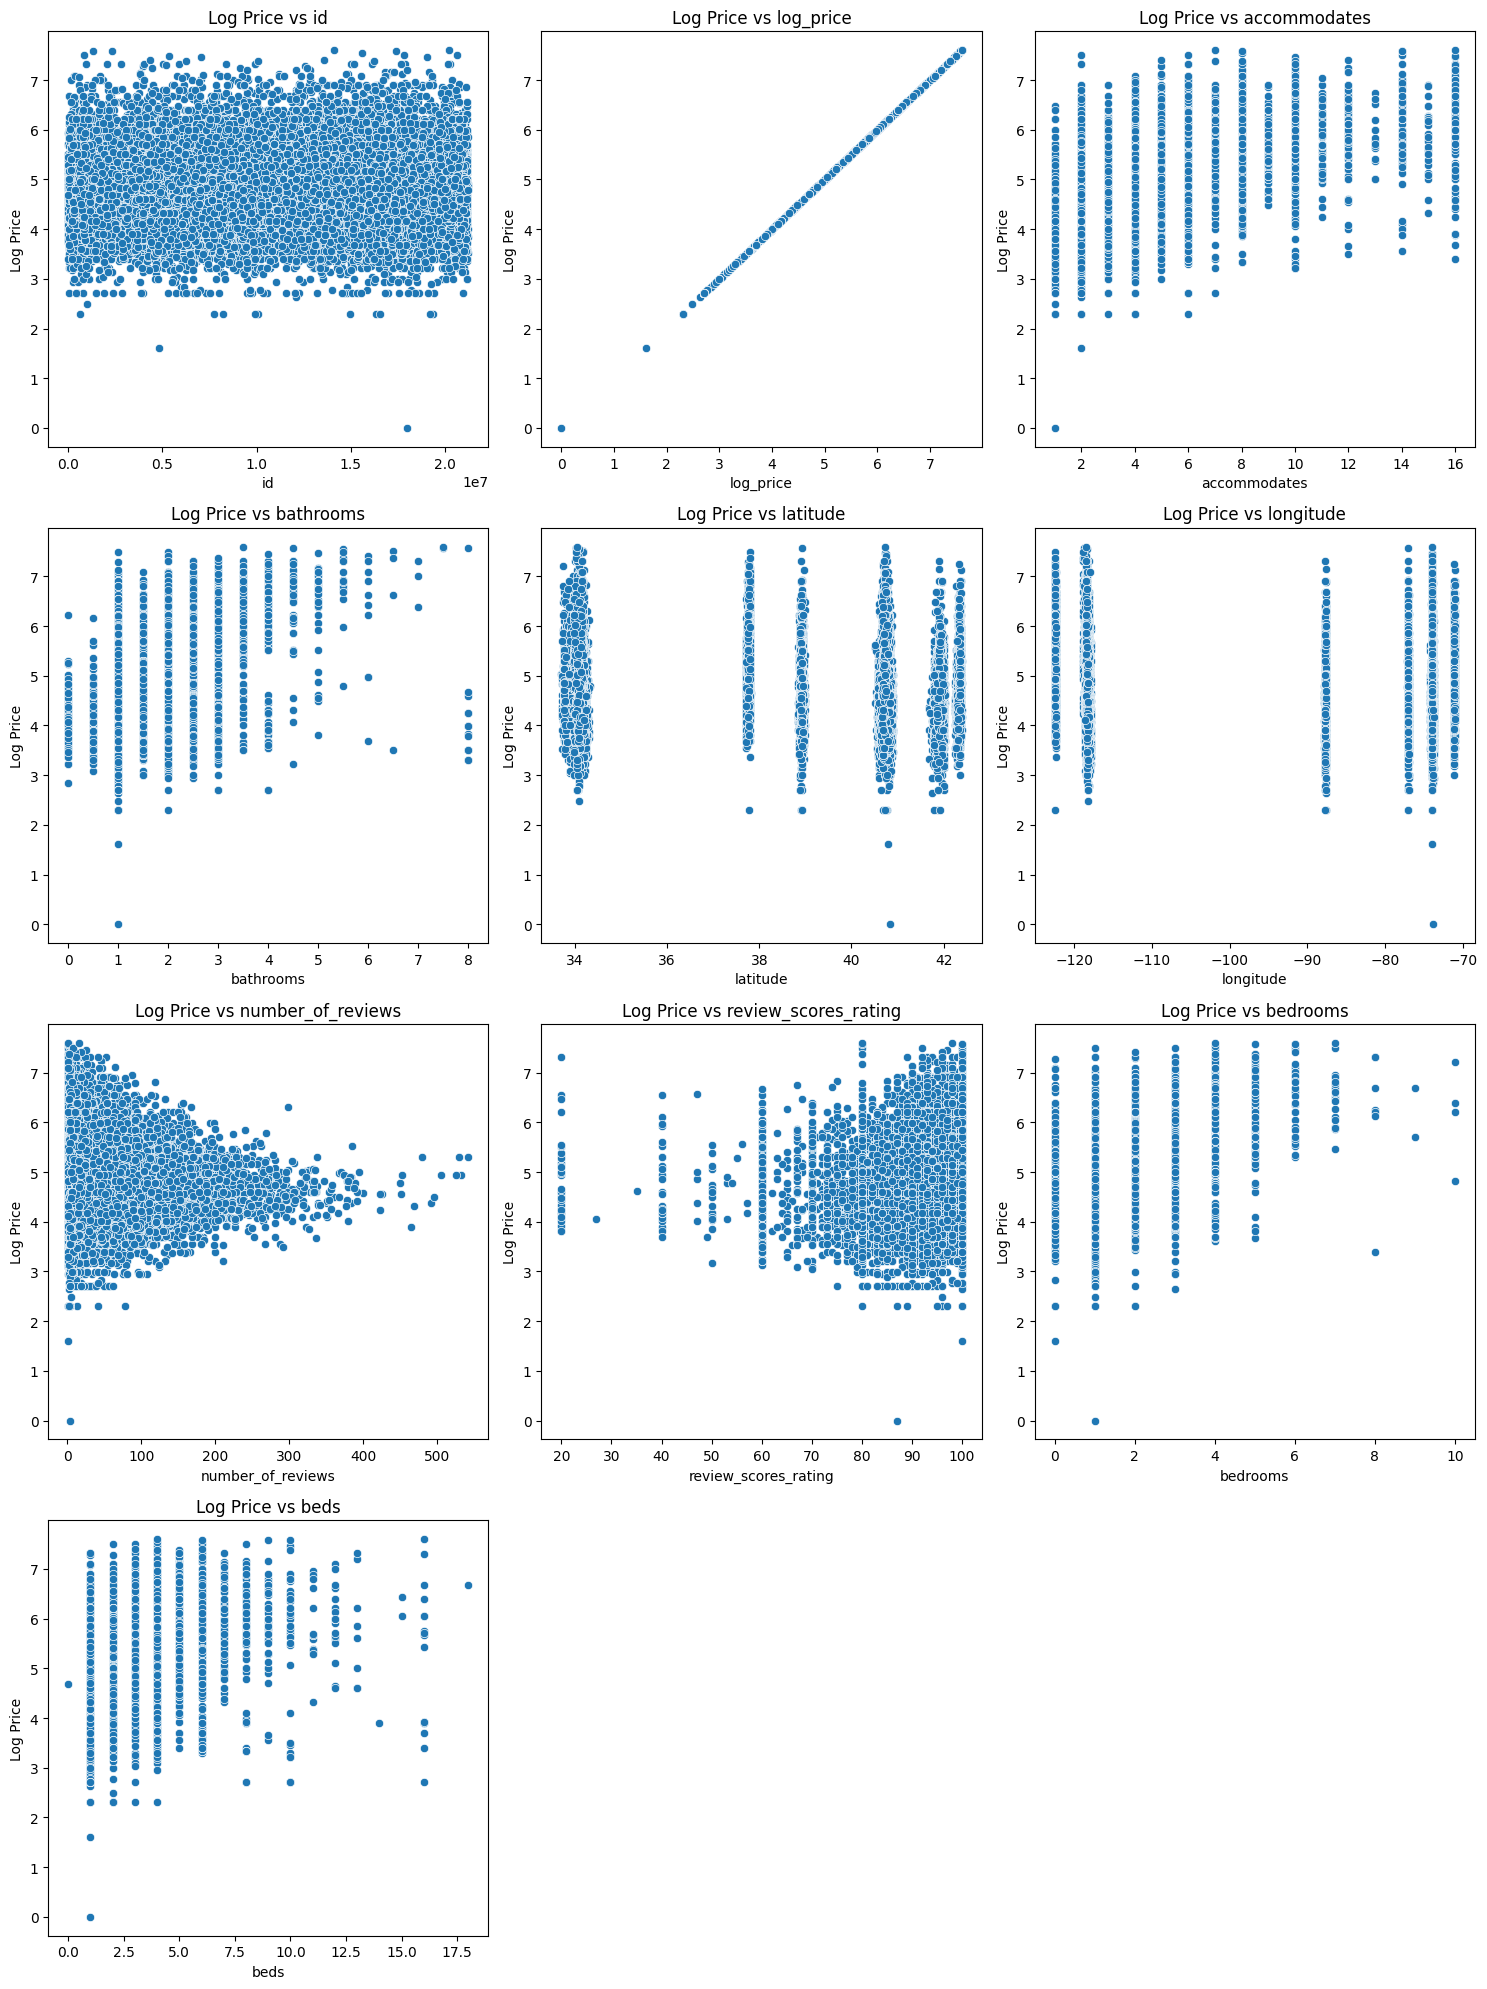

In [ ]:
# Scatterplots for numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numerical_features)
num_cols = 3  # Number of columns in the grid layout
num_rows = -(-num_features // num_cols)  # Number of rows needed
plt.figure(figsize=(15, 5*num_rows))

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.scatterplot(x=data[feature], y=data['log_price'])
    plt.title(f'Log Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

The scatter plots look good. Now we can create a corelation matrix to provide numerical values of corelation.

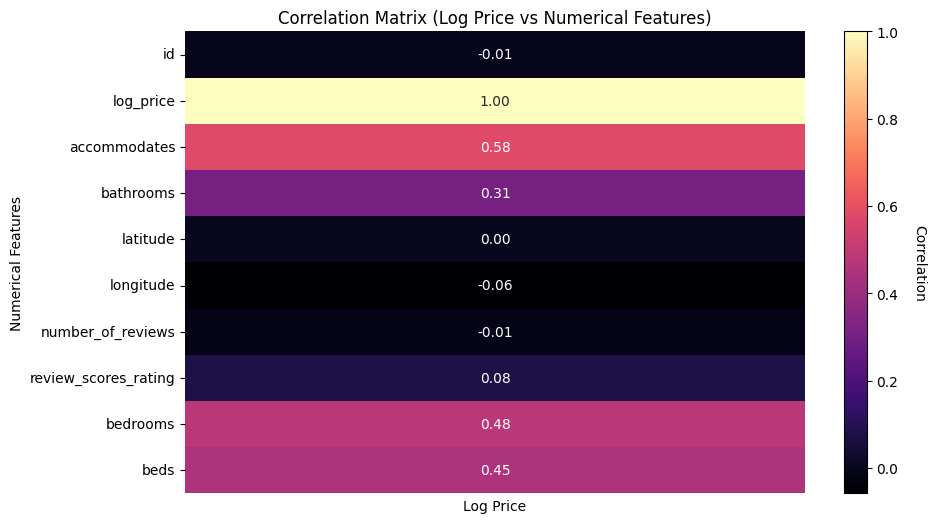

In [ ]:
correlation_matrix = data[numerical_features].corrwith(data['log_price'])

# Plot correlation matrix
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='magma', cbar=False, fmt=".2f")
plt.title('Correlation Matrix (Log Price vs Numerical Features)')
plt.xlabel('Log Price')
plt.ylabel('Numerical Features')

# Adjust x-axis ticks to remove 0
plt.xticks(ticks=[], rotation=45)

# Add custom colorbar
colorbar = plt.colorbar(heatmap.collections[0], orientation='vertical')
colorbar.set_label('Correlation', rotation=270, labelpad=20)
plt.show()

It seems like the Latitude, Longitude, Id, Number of Reviews, Review Score Rating, features dont really have any corelation with the Log Price.

**Categorical Values**

Lets check the category types in each category.

In [ ]:
# Filter columns based on data types (object, bool)
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Show unique values for each column
for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"Unique values for {col}:")
    print(unique_values)
    print()

Unique values for room_type:
['Entire home/apt' 'Private room' 'Shared room']

Unique values for cancellation_policy:
['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']

Unique values for cleaning_fee:
[ True False]

Unique values for instant_bookable:
['t' 'f']



We can plot the distribution of the categorical features using a multi-coloured histogram, shown below.

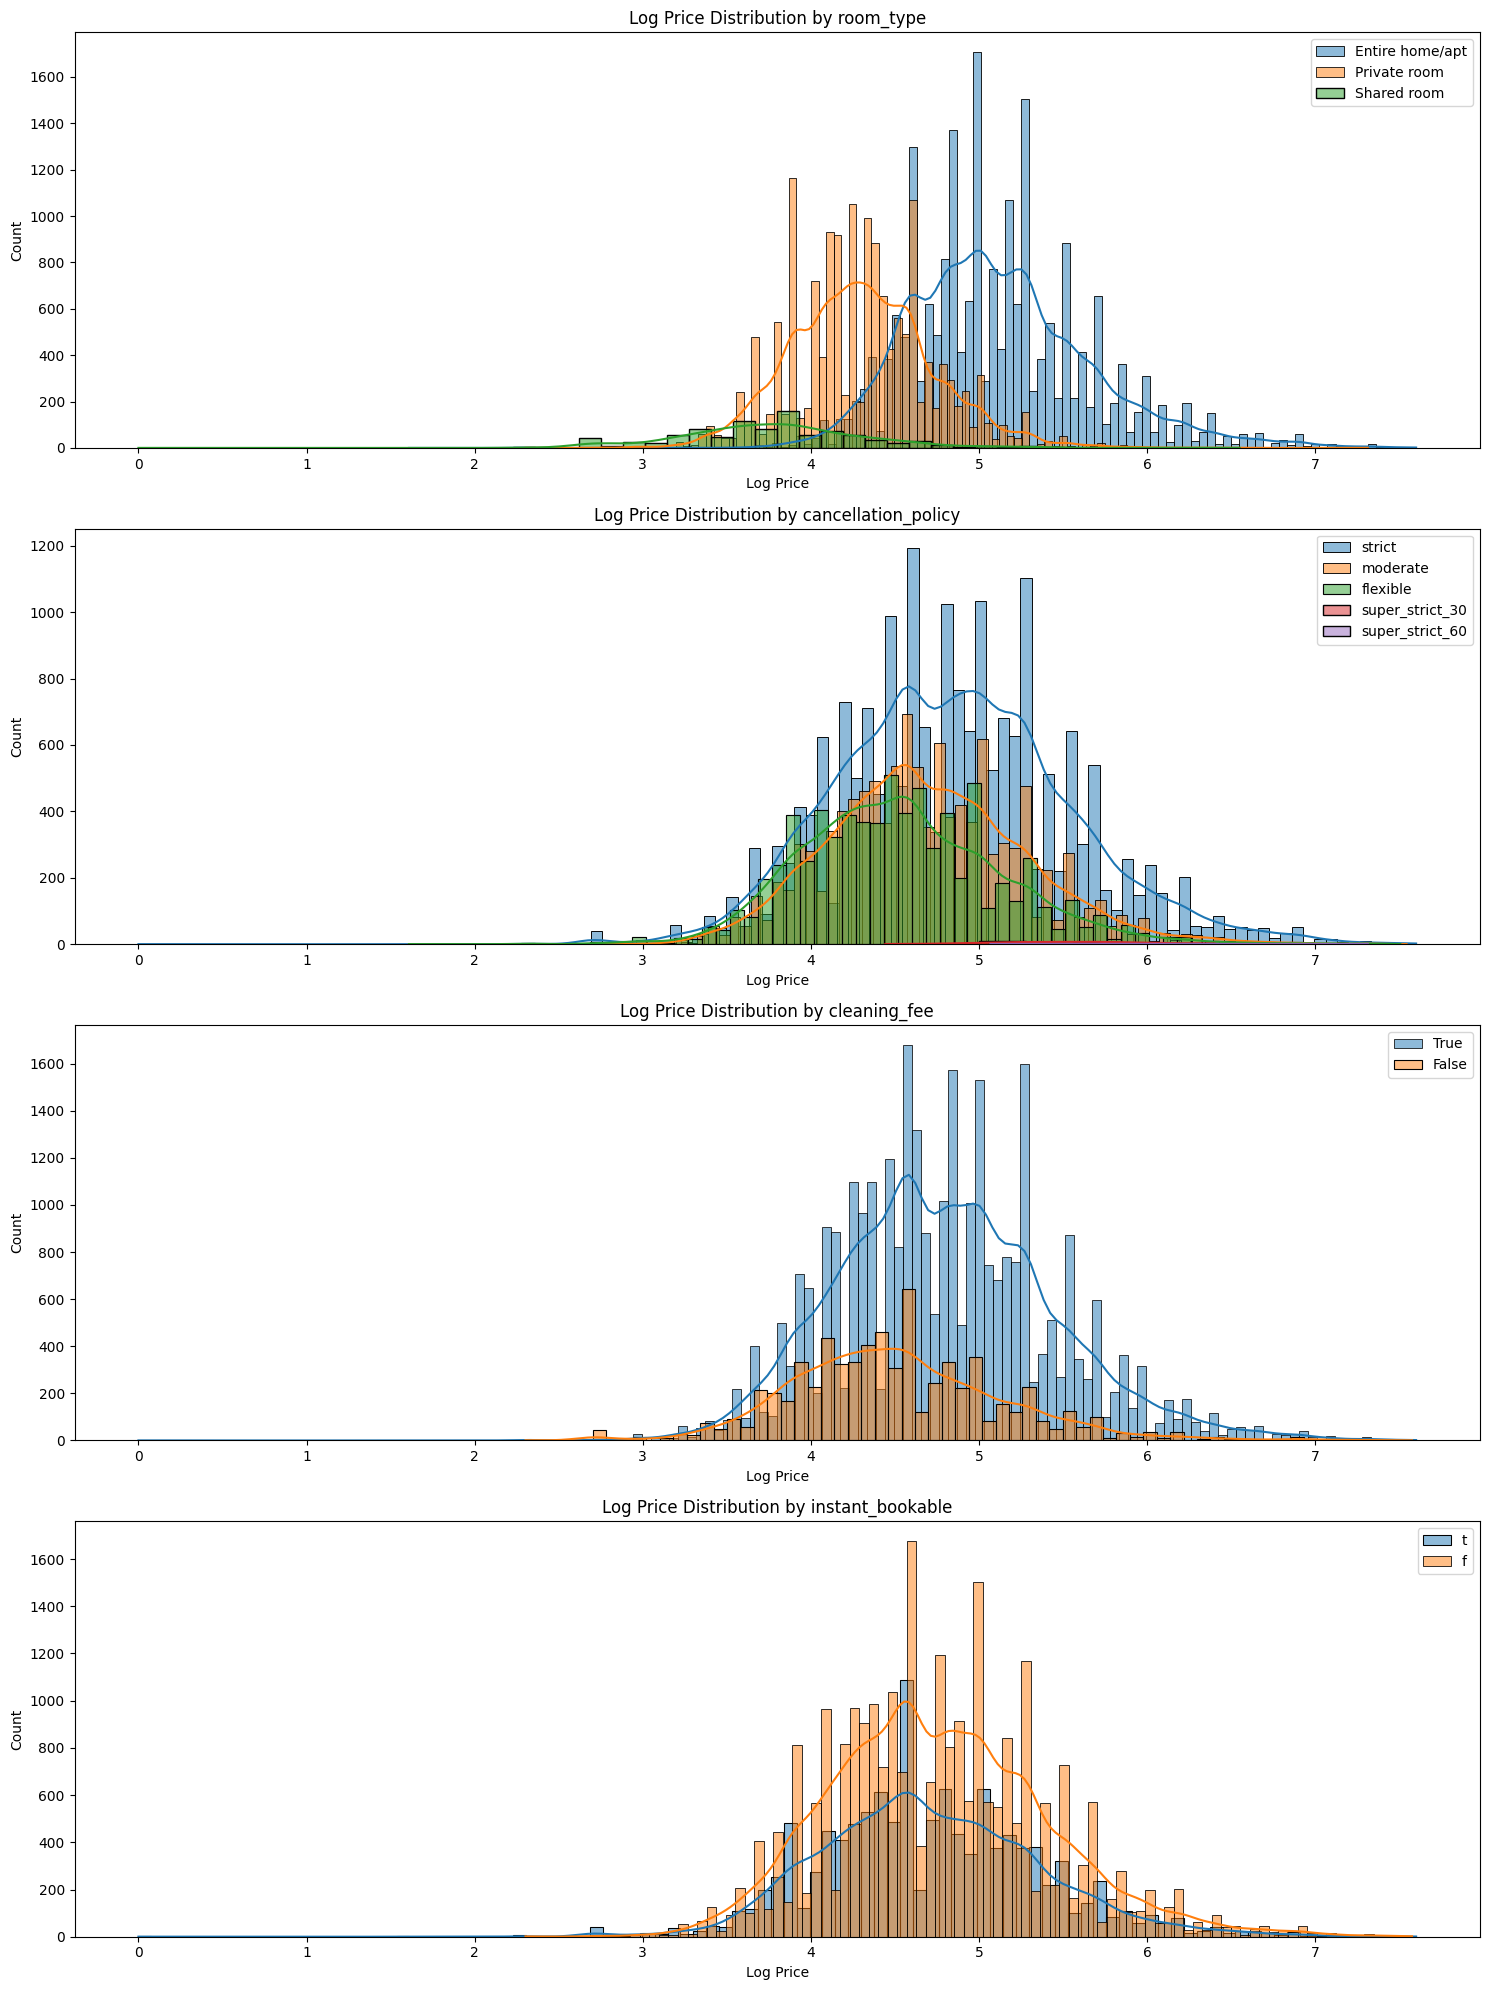

In [ ]:
# Histograms of log_price for each category of a categorical feature
plt.figure(figsize=(15, 5 * len(categorical_columns)))

for i, feature in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i+1)
    for category in data[feature].unique():
        sns.histplot(data[data[feature] == category]['log_price'], kde=True, label=category)
    plt.title(f'Log Price Distribution by {feature}')
    plt.xlabel('Log Price')
    plt.legend()

plt.tight_layout()
plt.show()

Lets create a corelation matrix relating the categorical features to the Target variable.

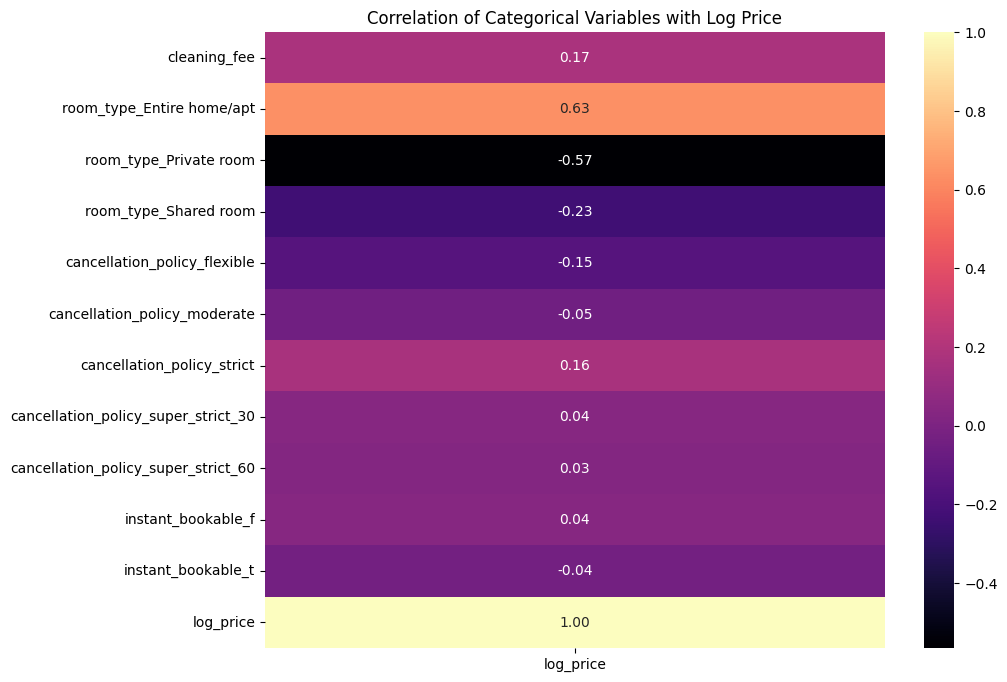

In [ ]:
# Encode categorical variables and concatenate with target variable
encoded_data_with_target = pd.get_dummies(data[categorical_columns]).join(data['log_price'])

# Calculate correlation matrix
correlation_matrix_with_target = encoded_data_with_target.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_target[['log_price']], annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation of Categorical Variables with Log Price')
plt.show()

It looks like none of the categorical features have a strong relationship with the Log Price, as most of the values are close to zero.

### **Feature Selection**

The chosen features are, 'accommodates', 'bedrooms', 'beds', and 'bathrooms'.
This decision is rooted in their stronger correlations with the target variable ('log_price'), surpassing a threshold of 0.5.

In contrast, categorical features were excluded as their correlations fell below this threshold and were mainly close to zero, indicating weaker linear relationships with the target variable.

By prioritizing numerical features with higher correlations, we aim to simplify the model, reduce overfitting risks, and enhance predictive accuracy by focusing on the most influential predictors.

In [ ]:
selected_features = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
target_variable = 'log_price'

print("Selected Features:", selected_features)

Selected Features: ['accommodates', 'bedrooms', 'beds', 'bathrooms']


### **Training**

The dataset will now be split into training and testing sets, with a ratio of 80% and 20% respectively.

In [ ]:
# Splitting the data into training and testing sets
X = data[selected_features]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The training is done using the Linear Regression Model, as it is the most suitable for this Log Price prediction problem.

In [ ]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Testing**

In [ ]:
# Predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print MSE for training and testing data
print("Mean Squared Error (MSE) on training data:", mse_train)
print("Mean Squared Error (MSE) on testing data:", mse_test)

Mean Squared Error (MSE) on training data: 0.27992838096245637
Mean Squared Error (MSE) on testing data: 0.2769251288006488


Based on the MSE of both the Training and Testing Data, **it seems like the model is perfoming relatively well. The two MSE's are close to each other**, but the MSE of the Training Data is a big larger than the Testing.

Some of the predictions made are shown below to verify the results.

In [ ]:
print("Predicted vs. Actual Values:")
for i in range(5):
    print(f"Predicted: {y_test_pred[i]:.2f} | Actual: {y_test.iloc[i]:.2f}")

Predicted vs. Actual Values:
Predicted: 4.73 | Actual: 5.42
Predicted: 4.54 | Actual: 4.30
Predicted: 4.92 | Actual: 4.87
Predicted: 4.54 | Actual: 3.81
Predicted: 4.92 | Actual: 5.07


These predictions are now visually plotted against the actual values to show the accuracy of the model.

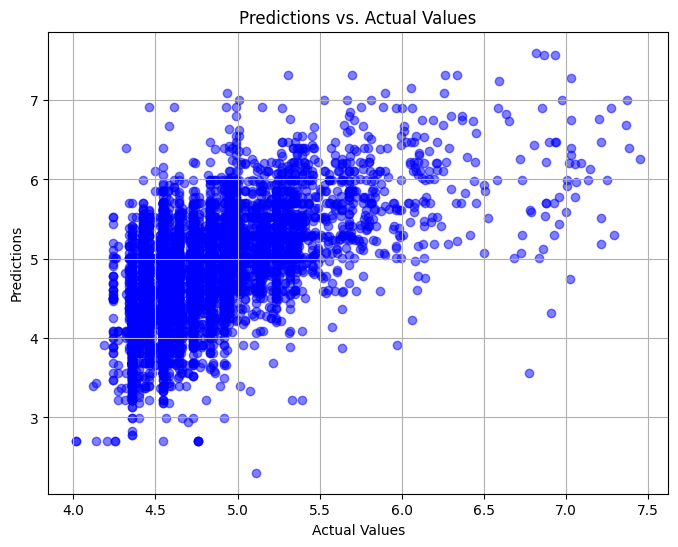

In [ ]:
# Plotting the predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, y_test, color='blue', alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

**References for Q2**

https://www.kaggle.com/code/srilalithagarapati/airbnb-data-analysis
https://www.kaggle.com/code/tahirelfaki/airbnb-price-prediction-model-linear-regression/notebook